Name: Nazmus Sakib, Student_ID: 33361881, FIT5201 - S2 2023, Assignment 1, Section 3

#Section 3 -  Ridge Regression

In this section, you develop Ridge Regression by adding the L2 norm regularization to the linear regression (covered in Activity 2.1 of Module 2) and study the effect of the L2 norm regularization on the training and testing errors. This section assesses your mathematical skills (derivation), programming, and analytical skills.

In [14]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

##Question 6 [Ridge Regression]

1. Derive the weight update steps of stochastic gradient descent (SGD) for linear regression with L2 regularization norm or a system of linear equations that uniquely determine the minimum of the regularized error function. Give this derivation with enough explanation in a markdown cell (ideally using Latex for readable math typesetting). The starting point is the definition of the regularized error function and the end result is either the weight update step for this function in (stochastic) gradient descent or a system of linear equations described in matrix/vector notation. In both cases, you have to derive the gradient as an intermediate step.
Hint: Recall that for linear regression we defined the error function E. For this assignment, you only need to add an L2 regularization term to the error function (error term plus the regularization term). This question is similar to Activity 2.1 of Module 2.

The regularized error function for Ridge Regression can be defined as:


E(w)= 1/2N ∑i=1 and *N*(*yi*−**x** *i* *T* w)^2 + λ/2∣∣w∣∣2 2

*N* is the number of data points, *yi* is the target variable for data point *i*,*xi* is the feature vector for data point *i*, **w** is the weight vector, and λ is the regularization parameter.

Taking the gradient with respect to **w**, we get:

∇E(*w*)=-1/*N*∑i=1 and N(**x** *i*(*yi*−**x** *i* *T*w))+λw

The weight update step for stochastic gradient descent (SGD) with Ridge Regression becomes:

w←w+η(**x** *i*(*yi*−**x** *i* *T*w)−λw)

where η is the learning rate.

2. Using the analytically derived gradient from Step I, implement either a direct or a (stochastic) gradient descent algorithm for Ridge Regression (use again the usual template with init , fit, and predict methods. You cannot use any import from sklearn.linear model for this task.

In [4]:
class RidgeRegressorSGD:

    def __init__(self, alpha=1, eta=0.01, batch_size=1, tau_max=1000, epsilon=0.00001, random_state=None):
        self.alpha = alpha
        self.eta = eta
        self.batch_size = batch_size
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.random_state = random_state

    def fit(self, X, y):
        RNG = np.random.default_rng(self.random_state)
        n, p = X.shape
        self.w_ = np.zeros(shape=(self.tau_max+1, p))
        for tau in range(1, self.tau_max+1):
            w_old = self.w_[tau-1]
            idx = RNG.choice(n, size=self.batch_size, replace=True)
            X_batch = X[idx]
            y_batch = y[idx]
            error = X_batch.T.dot(X_batch.dot(w_old) - y_batch)
            self.w_[tau] = w_old - self.eta * (error + self.alpha * w_old)
            if np.linalg.norm(self.w_[tau]-w_old) < self.epsilon:
                break
        self.coef_ = self.w_[tau]
        self.w_ = self.w_[:tau+1]
        return self

    def predict(self, X):
        return X.dot(self.coef_)


3. Study the effect of the L2-regularization on the training and testing errors, using the synthetic data generator from Activity 2.3. i.e., where data is generated according to
X ∼ Uniform(−0.3, 0.3)
Y = (sin(5πx))/(1 + 2x) + ϵ
ϵ ∼ N(0, 0.1)

  a. Consider the ridge regression model for each λ in {10^(−10+9i/100), . . . , 10^(−1) : 0 ≤ i ≤ 100} by creating a pipeline of your implemented ridge regressor with a polynomial feature transformer with degree 5. Hint: You can create an array with the above choices for λ via numpy.geomspace(10**-10, 0.1, 101, endpoint=True).

In [13]:
def generate_synthetic_data(n):
    # Generate synthetic data according to the specified distribution
    X = np.random.uniform(-0.3, 0.3, n)
    epsilon = np.random.normal(0, 0.1, n)
    y = (np.sin(5 * np.pi * X) / (1 + 2 * X)) + epsilon
    return X.reshape(-1, 1), y


lambda_vals = np.geomspace(10**-10, 0.1, 101, endpoint=True)
degree = 5

train_errors = []
test_errors = []

for lambda_val in lambda_vals:
    poly_features = PolynomialFeatures(degree=degree)
    ridge_reg = RidgeRegressorSGD(alpha=lambda_val, eta=0.01, batch_size=10, tau_max=1000)

    model = Pipeline([
        ("poly_features", poly_features),
        ("ridge_reg", ridge_reg),
    ])

    train_errors_lambda = []
    test_errors_lambda = []

    for _ in range(10):
        X_train, y_train = generate_synthetic_data(20)
        X_test, y_test = generate_synthetic_data(1000)

        model.fit(X_train, y_train)

        train_errors_lambda.append(mean_squared_error(y_train, model.predict(X_train)))
        test_errors_lambda.append(mean_squared_error(y_test, model.predict(X_test)))

    train_errors.append(np.mean(train_errors_lambda))
    test_errors.append(np.mean(test_errors_lambda))

print(f"Train Errors: {train_errors}")
print(f"Test Errors: {test_errors}")

Train Errors: [0.7805979316539904, 0.8154062646305082, 0.8000153718040524, 0.7495325856454789, 0.6050882292147245, 0.5702714138338474, 0.7822395554014783, 0.729881773654871, 0.6949418690185324, 0.6767692508472557, 0.7452496770562677, 0.6853537871528788, 0.7441524366057333, 0.7808372195138484, 0.7296515253302962, 0.7368096954797761, 0.7587706244949067, 0.7066583448164054, 0.6375725609202135, 0.586613451216685, 0.6939786461242066, 0.6082938883029655, 0.7811758151222734, 0.6822199701927402, 0.7080599610719445, 0.7384778650550203, 0.6240464301294092, 0.7544394595576231, 0.5506595806798946, 0.7331577249180801, 0.7342665169128032, 0.693317434229132, 0.7464569976467141, 0.7400944732441503, 0.6662352565775405, 0.7710594478466921, 0.6784815412041486, 0.643924693402404, 0.6827434426895153, 0.8225075777383125, 0.6135118521906664, 0.5632055713314316, 0.7507140753257728, 0.7819482387654692, 0.7191574311986797, 0.7166978751547509, 0.6056076125132018, 0.7655027075018275, 0.6517318504192001, 0.7101647

b. Fit each model at least ten times (resampling a training dataset of size 20 each time) for all choices of λ. To reduce the variance of the experiment make sure that for each repetition all models use the same training dataset (i.e., make the repetitions the outer loop and the choices of λ the inner loop, and sample only one training set per outer loop).

In [15]:
lambda_vals = np.geomspace(10**-10, 0.1, 101, endpoint=True)
degree = 5

# Define a list to store the results for each lambda value and repetition
results = []

for lambda_val in lambda_vals:
    # Initialize lists to store results for each repetition
    train_errors = []
    test_errors = []

    for _ in range(10):  # Repeat each lambda at least ten times
        # Generate synthetic data
        X_train, y_train = generate_synthetic_data(20)
        X_test, y_test = generate_synthetic_data(1000)

        # Create pipeline
        poly_features = PolynomialFeatures(degree=degree)
        ridge_reg = RidgeRegressorSGD(alpha=lambda_val, eta=0.01, batch_size=10, tau_max=1000)

        model = Pipeline([
            ("poly_features", poly_features),
            ("ridge_reg", ridge_reg),
        ])

        # Fit model
        model.fit(X_train, y_train)

        # Calculate errors
        train_error = mean_squared_error(y_train, model.predict(X_train))
        test_error = mean_squared_error(y_test, model.predict(X_test))

        train_errors.append(train_error)
        test_errors.append(test_error)

    # Calculate mean and standard deviation of errors for this lambda value
    mean_train_error = np.mean(train_errors)
    std_train_error = np.std(train_errors)
    mean_test_error = np.mean(test_errors)
    std_test_error = np.std(test_errors)

    # Store the results for this lambda value
    results.append((lambda_val, mean_train_error, std_train_error, mean_test_error, std_test_error))

# Display the results
results_df = pd.DataFrame(results, columns=["Lambda", "Mean Train Error", "Std Train Error", "Mean Test Error", "Std Test Error"])
print(results_df)

# Print the mean of each column
mean_results = results_df.mean()
print("\nMean Results:")
print(mean_results)

           Lambda  Mean Train Error  Std Train Error  Mean Test Error  \
0    1.000000e-10          0.740385         0.237807         0.834992   
1    1.230269e-10          0.806584         0.209570         0.879714   
2    1.513561e-10          0.614269         0.139460         0.854807   
3    1.862087e-10          0.625829         0.181140         0.849543   
4    2.290868e-10          0.542092         0.197643         0.927755   
..            ...               ...              ...              ...   
96   4.365158e-02          0.642488         0.261064         0.875356   
97   5.370318e-02          0.843589         0.137834         0.815726   
98   6.606934e-02          0.627189         0.083004         0.860135   
99   8.128305e-02          0.789285         0.124822         0.822560   
100  1.000000e-01          0.798629         0.104722         0.864817   

     Std Test Error  
0          0.086295  
1          0.088368  
2          0.068736  
3          0.103005  
4          0.

c. Create a plot of mean squared errors (use different colors for the training and testing errors), where the x-axis is log lambda and y-axis is the log mean squared error. Discuss λ, model complexity, and error rates, corresponding to underfitting and overfitting, by observing your plot.
Hint: For log-scaling an axis you can use, e.g., pyplot.x scale(’log’). Moreover, note that, as we have a synthetic data source here, you can simply sample a large amount of independent test data and re-use that to approximate the generalisation error for all fits.

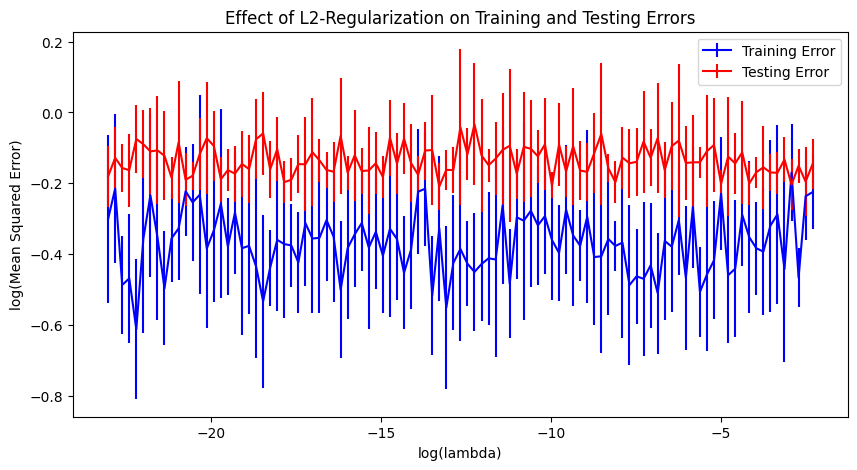

In [16]:
# Assuming `results_df` is already defined from the previous code block
plt.figure(figsize=(10, 5))
plt.errorbar(np.log(results_df["Lambda"]), np.log(results_df["Mean Train Error"]), yerr=results_df["Std Train Error"], label='Training Error', color='blue')
plt.errorbar(np.log(results_df["Lambda"]), np.log(results_df["Mean Test Error"]), yerr=results_df["Std Test Error"], label='Testing Error', color='red')

plt.xlabel('log(lambda)')
plt.ylabel('log(Mean Squared Error)')
plt.title('Effect of L2-Regularization on Training and Testing Errors')
plt.legend()
plt.show()